# NBA Players EDA


### Data: Basketball Reference (1982 - 2022)
<!-- <span style="background-color:yellow">MVP features</span> -->
<span style="background-color:lightblue">MVP</span>
<span style="background-color:red">Defensive POTY</span>
<span style="background-color:lightgreen"></span>
- **season**        (Year)
- **player**        (Player Name)
- **pos**           (Position)
- **age**           (Age)
- **team_id**       (Team Abbreviation) _"TOT" means total teams for players who played for multiple teams in one year_
- **g**             (Games Played)
- **gs**            (Games Started)
- **mp_per_g**      (Minutes per Game)
- <span style="background-color:lightblue">**fg_per_g**</span>     (Field Goals per Game)
- **fga_per_g**     (Field Goals Attempted per Game)
- <span style="background-color:lightblue">**fg_pct**</span>        (Field Goal Percentage per Game)
- <span style="background-color:lightblue">**fg3_per_g**</span>     (3pt Shots per Game)
- **fg3a_per_g**    (3pt Shot Attempts per Game)
- <span style="background-color:lightblue">**fg3_pct**</span>       (3pt Percentage per Game)
- <span style="background-color:lightblue">**fg2_per_g**</span>     (2pt Shots per Game)
- **fg2a_per_g**    (2pt Shot Attempts per Game)
- <span style="background-color:lightblue">**fg2_pct**</span>       (2pt Percentage per Game)
- <span style="background-color:lightblue">**efg_pct**</span> (Effective Shooting Percentage per Game) _High Level Stat taking into account num of points scored on each possession_

$$eFG\%=\frac{\text{2pt FG} + (1.5 \times \text{3pt FG})}{FGA}$$

- <span style="background-color:lightblue">**ft_per_g**</span> (Free Throws per Game)
- **fta_per_g** (Free Throw Attempts per Game)
- <span style="background-color:lightblue">**ft_pct**</span> (Free Throw percentage per Game)
- <span style="background-color:red">**orb_per_g**</span> (Offensive Rebounds per Game)
- <span style="background-color:red">**drb_per_g**</span> (Defensive Rebounds per Game)
- <span style="background-color:red">**trb_per_g**</span> (Total Rebounds per Game)
- <span style="background-color:lightblue">**ast_per_g**</span> (Assists per Game)
- <span style="background-color:red">**stl_per_g**</span> (Steals per Game)
- <span style="background-color:red">**blk_per_g**</span> (Blocks per Game)
- <span style="background-color:lightblue">**tov_per_g**</span> (Turnovers per Game)
- **pf_per_g** (Personal Fouls per Game)
- <span style="background-color:lightblue">**pts_per_g**</span> (Points per Game)
- <span style="background-color:red">**mp**</span> (Minutes Played)
- <span style="background-color:lightblue">**per**</span> (Player Efficiency Rating)
- <span style="background-color:lightblue">**ts_pct**</span> (True Shooting Percentage)
$$TS\% = \frac{PTS}{2*(FGA + 0.44*FTA)}$$
- <span style="background-color:lightblue">**fg3a_per_fga_pct**</span> (3pt Shots Attempted per Field Goal Shot Attempted Percentage)
- <span style="background-color:lightblue">**fta_per_fga_pct**</span> (Free Throw Shot Attempted per Field Goal Shot Percentage)
- <span style="background-color:red">**orb_pct**</span> (Offensive Rebound Percentage)
- <span style="background-color:red">**drb_pct**</span> (Defensive Rebound Percentage)
- <span style="background-color:red">**trb_pct**</span> (Total Rebound Percentage)
- <span style="background-color:lightblue">**ast_pct**</span> (Assist Percentage)
- <span style="background-color:red">**stl_pct**</span> (Steal Percentage)
- <span style="background-color:red">**blk_pct**</span> (Block Percentage)
- **tov_pct** (Turnover Percentage)
- <span style="background-color:lightblue">**usg_pct**</span> (Usage Percentage)
- <span style="background-color:lightblue">**ows**</span> (Offensive Win Shares)
- <span style="background-color:red">**dws**</span> (Defensive Win Shares)
- <span style="background-color:lightblue">**ws**</span> (Win Shares) _Estimated Num of Wins contributed by Player_
- **ws_per_48** (Win Shares per 48 Minutes played)
- <span style="background-color:lightblue">**obpm**</span> (Offensive Box +/-)
- <span style="background-color:red">**dbpm**</span> (Defensive Box +/-)
- **bpm** (Box +/-)
- <span style="background-color:lightblue">**vorp**</span> (Value over Replacement Player)
- **award_share** (MVP Voting Win Share Percentage)
- **mov** (Average Margin of Victory during Season)
- **adj_mov** (Average Margin of Victory Adjusted for Opponent Difficulty during Season)
- **win_loss_pct** (Team Win Loss Percentage)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
import seaborn as sns

ModuleNotFoundError: No module named 'seaborn'

# Data

In [2]:
player_data = pd.read_csv('data/bbr_preprocessed_3_4_24.csv')

In [3]:
player_data.isna().sum()

Unnamed: 0             0
player                 0
pos                    0
age                    0
team_id                0
g                      0
gs                     0
mp_per_g               0
fg_per_g               0
fga_per_g              0
fg_pct                 7
fg3_per_g              0
fg3a_per_g             0
fg3_pct               46
fg2_per_g              0
fg2a_per_g             0
fg2_pct               14
efg_pct                7
ft_per_g               0
fta_per_g              0
ft_pct                48
orb_per_g              0
drb_per_g              0
trb_per_g              0
ast_per_g              0
stl_per_g              0
blk_per_g              0
tov_per_g              0
pf_per_g               0
pts_per_g              0
mp                     0
per                    0
ts_pct                 7
fg3a_per_fga_pct       7
fta_per_fga_pct        7
orb_pct                0
drb_pct                0
trb_pct                0
ast_pct                0
stl_pct                0


In [4]:
player_data[player_data['player'] == "LeBron James"]

,Unnamed: 0,player,pos,age,team_id,g,gs,mp_per_g,fg_per_g,fga_per_g,...,dbpm,bpm,vorp,season,ows,award_share,mov,mov_adj,win_loss_pct,experience
271,271,LeBron James,PF,39,LAL,54,54,35.1,9.6,18.2,...,0.8,6.2,3.9,2024,NaN,NaN,NaN,NaN,NaN,21
9208,9208,LeBron James,SG,19,CLE,79,79,39.5,7.9,18.9,...,-0.6,1.7,2.9,2004,2.4,0.009,-2.62,-3.07,0.427,1
9662,9662,LeBron James,SF,20,CLE,80,80,42.4,9.9,21.1,...,1.7,8.6,9.1,2005,9.7,0.073,0.79,0.27,0.512,2
10118,10118,LeBron James,SF,21,CLE,79,79,42.5,11.1,23.1,...,1.6,9.1,9.4,2006,12.0,0.550,2.23,2.17,0.610,3
10576,10576,LeBron James,SF,22,CLE,78,78,40.9,9.9,20.8,...,2.2,8.1,8.1,2007,8.0,0.142,3.83,3.33,0.610,4
11038,11038,LeBron James,SF,23,CLE,75,74,40.4,10.6,21.9,...,2.6,10.9,9.8,2008,10.7,0.348,-0.35,-0.52,0.549,5
11486,11486,LeBron James,SF,24,CLE,81,81,37.7,9.7,19.9,...,3.7,13.2,11.8,2009,13.7,0.969,8.93,8.68,0.805,6
11945,11945,LeBron James,SF,25,CLE,76,76,39.0,10.1,20.1,...,2.8,11.8,10.3,2010,13.3,0.980,6.52,6.17,0.744,7
12391,12391,LeBron James,SF,26,MIA,79,79,38.8,9.6,18.8,...,1.8,8.1,7.8,2011,10.3,0.431,7.46,6.76,0.707,8
12851,12851,LeBron James,SF,27,MIA,62,62,37.5,10.0,18.9,...,2.7,10.9,7.6,2012,10.0,0.888,5.98,5.72,0.697,9


In [5]:
dropped_col_df = player_data.drop(columns=['Unnamed: 0', 'award_share', 'ows', 'mov', 'mov_adj', 'win_loss_pct'])
df = dropped_col_df.fillna(0.0)

In [6]:
df[df['season'] >= 2017]

,player,pos,age,team_id,g,gs,mp_per_g,fg_per_g,fga_per_g,fg_pct,...,usg_pct,dws,ws,ws_per_48,obpm,dbpm,bpm,vorp,season,experience
0,Precious Achiuwa,PF-C,24,TOT,54,15,22.5,3.4,6.8,0.496,...,16.4,1.5,2.5,0.097,-1.6,-0.1,-1.7,0.1,2024,4
1,Ochai Agbaji,SG,23,TOT,60,11,19.1,2.1,5.1,0.418,...,13.1,0.5,0.4,0.018,-2.9,-0.6,-3.5,-0.4,2024,2
2,OG Anunoby,SF,26,TOT,41,41,34.1,5.8,11.7,0.498,...,17.6,1.2,2.5,0.087,-0.6,0.5,-0.1,0.7,2024,7
3,Marvin Bagley III,C,24,TOT,43,21,21.1,4.8,8.2,0.581,...,21.1,0.5,2.2,0.114,0.6,-1.6,-1.0,0.2,2024,6
4,Dalano Banton,PG,24,TOT,32,1,9.6,1.5,3.7,0.419,...,22.0,0.4,0.4,0.056,-2.3,0.3,-2.0,0.0,2024,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18779,Thaddeus Young,PF,34,TOR,54,9,14.7,2.0,3.7,0.545,...,13.5,1.1,1.8,0.109,-1.8,1.9,0.1,0.4,2023,16
18780,Trae Young,PG,24,ATL,73,73,34.8,8.2,19.0,0.429,...,32.6,1.4,6.7,0.126,5.3,-2.0,3.3,3.4,2023,5
18781,Omer Yurtseven,C,24,MIA,9,0,9.2,1.8,3.0,0.593,...,18.0,0.1,0.3,0.159,-2.5,-1.5,-3.9,0.0,2023,2
18782,Cody Zeller,C,30,MIA,15,2,14.5,2.5,3.9,0.627,...,18.1,0.3,0.7,0.147,-2.0,-0.7,-2.8,0.0,2023,10


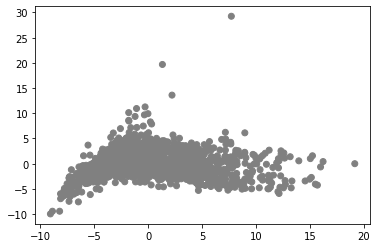

In [7]:
pca = PCA(n_components=2)

data = df[(df['season'] > 2000) & (df['experience'] == 1)].reset_index()
scaled_player_data = StandardScaler().fit_transform(data.drop(columns=['player', 'pos', 'team_id', 'season']))
pca_data = pca.fit_transform(scaled_player_data)
# pca_data = pca.fit_transform(data.drop(columns=['Rk','player', 'pos', 'team_id', 'season']))

color_list = ["grey" for i in range(len(data))]
# color_list[132] = 'red'
# color_list[181] = 'red'
# color_list[324] = 'red'
# color_list[391] = 'red'
# color_list[409] = 'red'
# color_list[585] = 'red'
# color_list[642] = 'red'
# color_list[786] = 'red'
# color_list[835] = 'red'
# color_list[929] = 'red'
# color_list[1055] = 'red'
# color_list[90] = 'red'

name_list = list(data['player'])
plt.scatter(pca_data[:, 0], pca_data[:, 1], c=color_list)
# for i, txt in enumerate(name_list):
#     plt.annotate(txt, (pca_data[:, 0][i], pca_data[:, 1][i]))

# data[data['player'] == 'Victor Wembanyama']


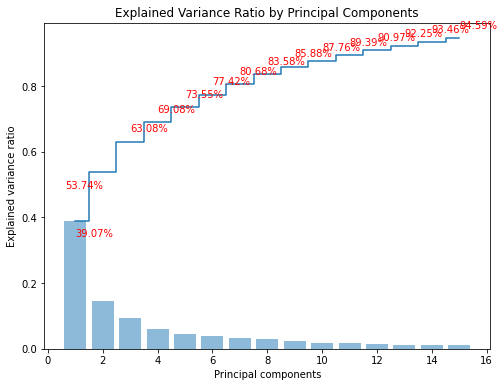

Number of components needed to explain 97.5% of variance: 1


In [8]:
pca = PCA(n_components = 15)
data = df[((df['season'] == 2024) | (df['season'] == 2004)) & (df['experience'] == 1)]
scaled_player_data = StandardScaler().fit_transform(data.drop(columns=['player', 'pos', 'team_id', 'season']))
pca_data = pca.fit_transform(scaled_player_data)
explained_variance_ratio = pca.explained_variance_ratio_

# Plot explained variance ratio
plt.figure(figsize=(8, 6))
plt.bar(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, alpha=0.5, align='center')
plt.step(range(1, len(explained_variance_ratio) + 1), np.cumsum(explained_variance_ratio), where='mid')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.title('Explained Variance Ratio by Principal Components')

cumulative_explained_variance_ratio = np.cumsum(explained_variance_ratio)
for i, cevr in enumerate(cumulative_explained_variance_ratio):
    if i == 0:
        plt.text(i + 1, cevr - 0.05, f'{cevr*100:.2f}%', ha='left', color='r')
    else:
        if (cumulative_explained_variance_ratio[i] - cumulative_explained_variance_ratio[i-1]) > 0.1:
            plt.text(i + 1, cevr - 0.05, f'{cevr*100:.2f}%', ha='right', color='r')
        else:
            plt.text(i + 1, cevr + 0.03, f'{cevr*100:.2f}%', ha='left', color='r')

plt.show()

n_components_95 = np.argmax(cumulative_explained_variance_ratio >= 0.95) + 1

print(f"Number of components needed to explain 97.5% of variance: {n_components_95}")

In [9]:
dropped_features = ['fg3a_per_g', 'vorp', 'mp_per_g', 'ast_pct', 'fta_per_g', 'fg2a_per_g', 
                    'fg3a_per_g', 'fg_per_g', 'orb_pct', 'drb_pct', 'blk_pct', 'drb_per_g',
                    'fga_per_g', 'trb_pct', 'ws_per_48', 'stl_pct', 'obpm', 'dbpm', 'usg_pct',
                    'age', 'ts_pct', 'g', 'per', 'dws', 'bpm', 'fg_pct', 'fg2_pct', 'ft_per_g',
                    'orb_per_g', 'tov_pct', 'fg3a_per_fga_pct', 'fg2_per_g', 'gs', 'ws',
                    'team_id', 'season', 'fta_per_fga_pct']

(160, 15)
fg3_per_g  fg3_per_g    1.000000
fg3_pct    fg3_pct      1.000000
pts_per_g  pts_per_g    1.000000
pf_per_g   pf_per_g     1.000000
tov_per_g  tov_per_g    1.000000
blk_per_g  blk_per_g    1.000000
stl_per_g  stl_per_g    1.000000
ast_per_g  ast_per_g    1.000000
trb_per_g  trb_per_g    1.000000
ft_pct     ft_pct       1.000000
efg_pct    efg_pct      1.000000
mp         mp           1.000000
           pts_per_g    0.836936
pts_per_g  mp           0.836936
tov_per_g  pts_per_g    0.835058
pts_per_g  tov_per_g    0.835058
tov_per_g  mp           0.827101
mp         tov_per_g    0.827101
tov_per_g  ast_per_g    0.818848
ast_per_g  tov_per_g    0.818848
mp         stl_per_g    0.796183
stl_per_g  mp           0.796183
mp         pf_per_g     0.761926
pf_per_g   mp           0.761926
stl_per_g  tov_per_g    0.760438
tov_per_g  stl_per_g    0.760438
pts_per_g  trb_per_g    0.758112
trb_per_g  pts_per_g    0.758112
           pf_per_g     0.755365
pf_per_g   trb_per_g    0.755365


Text(0.5, 1.0, 'NBA Rookies from 2024 and 2004')

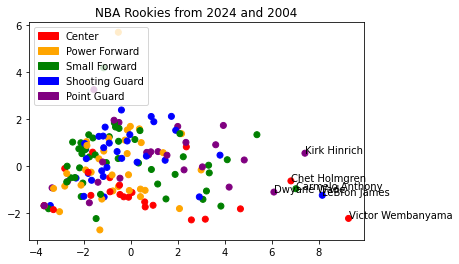

In [10]:
corr_data = data.drop(columns=dropped_features)
corr_matrix = corr_data.corr()
# corr_matrix = corr_matrix[corr_matrix < 1]
highest_corr = corr_matrix.abs().unstack().sort_values(ascending=False)
print(data.drop(columns=dropped_features).shape)
print(highest_corr[:50])
print(corr_data.columns)
pca = PCA(n_components=2)

scaled_player_data = StandardScaler().fit_transform(corr_data.drop(columns=['player', 'pos']))
pca_data = pca.fit_transform(scaled_player_data)
# pca_data = pca.fit_transform(data.drop(columns=['Rk','player', 'pos', 'team_id', 'season']))
def color_player(pos):
    if pos == 'C':
        return 'red'
    elif pos == 'PF':
        return 'orange'
    elif pos == 'SF':
        return 'green'
    elif pos == 'SG':
        return 'blue'
    elif pos == 'PG':
        return 'purple'
    else:
        return 'grey'
color_list = list(corr_data['pos'].apply(color_player))
name_list = list(corr_data['player'])
plt.scatter(pca_data[:, 0], pca_data[:, 1], c=color_list)
df3 = pd.DataFrame(pca_data, columns=["x", "y"])
df3[df3['x'] > 6].index.to_list()
for i, txt in enumerate(name_list):
    if i in df3[df3['x'] > 6].index.to_list():
        plt.annotate(txt, (pca_data[:, 0][i], pca_data[:, 1][i]))
red_patch = mpatches.Patch(color='red', label='Center')
orange_patch = mpatches.Patch(color='orange', label='Power Forward')
green_patch = mpatches.Patch(color='green', label='Small Forward')
blue_patch = mpatches.Patch(color='blue', label='Shooting Guard')
purple_patch = mpatches.Patch(color='purple', label='Point Guard')
plt.legend(handles=[red_patch, orange_patch, green_patch, blue_patch, purple_patch], loc='upper left')  
plt.title("NBA Rookies from 2024 and 2004")

In [11]:
corr_data

,player,pos,fg3_per_g,fg3_pct,efg_pct,ft_pct,trb_per_g,ast_per_g,stl_per_g,blk_per_g,tov_per_g,pf_per_g,pts_per_g,mp,experience
19,Tosan Evbuomwan,SF,0.5,0.333,0.472,0.000,2.7,1.0,0.2,0.2,0.2,1.0,2.8,90,1
30,Trey Jemison,C,0.0,0.000,0.487,0.778,3.7,0.8,0.4,1.0,1.0,2.8,4.5,171,1
39,Vasilije Micić,PG,0.5,0.243,0.457,0.765,1.0,3.4,0.4,0.1,1.2,0.9,4.7,590,1
47,Filip Petrušev,C,0.0,0.000,0.500,0.500,0.3,0.0,0.0,0.0,0.0,0.3,1.0,10,1
78,Ibou Badji,C,0.0,0.000,0.632,0.500,2.7,0.7,0.1,1.1,0.8,2.3,1.6,203,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9409,Slavko Vraneš,C,0.0,0.000,0.000,0.000,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3,1
9410,Dwyane Wade,PG,0.3,0.302,0.475,0.747,4.0,4.5,1.4,0.6,3.2,2.3,16.2,2126,1
9418,Luke Walton,PF,0.2,0.333,0.467,0.705,1.8,1.6,0.4,0.1,0.6,1.0,2.4,730,1
9426,David West,PF,0.0,0.000,0.474,0.713,4.2,0.8,0.4,0.4,0.7,1.6,3.8,930,1


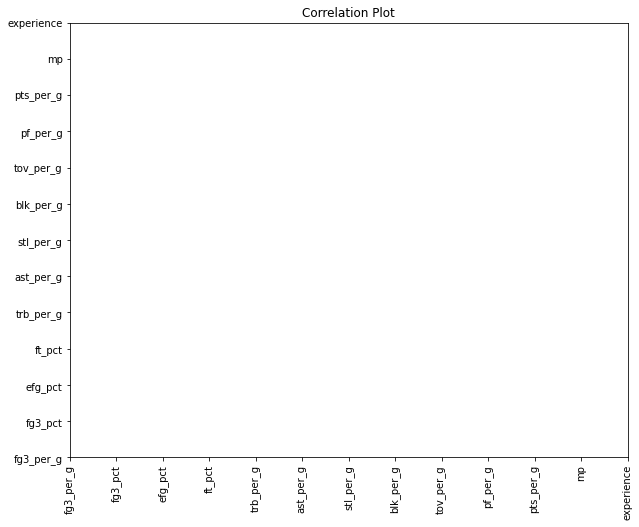

In [13]:
# plt.figure(figsize=(10, 8))
# # sns.heatmap(corr_matrix, annot=False, cmap='coolwarm')

# plt.xticks(ticks=range(len(corr_matrix.columns)), labels=corr_matrix.columns, rotation=90)
# plt.yticks(ticks=range(len(corr_matrix.columns)), labels=corr_matrix.columns, rotation=0)

# plt.title('Correlation Plot')
# plt.show()

## ROTY

In [14]:
dropped_features = ['fg3a_per_g', 'vorp', 'mp_per_g', 'ast_pct', 'fta_per_g', 'fg2a_per_g', 
                    'fg3a_per_g', 'fg_per_g', 'orb_pct', 'drb_pct', 'blk_pct', 'drb_per_g',
                    'fga_per_g', 'trb_pct', 'ws_per_48', 'stl_pct', 'obpm', 'dbpm', 'usg_pct',
                    'age', 'ts_pct', 'g', 'per', 'dws', 'bpm', 'fg_pct', 'fg2_pct', 'ft_per_g',
                    'orb_per_g', 'tov_pct', 'fg3a_per_fga_pct', 'fg2_per_g', 'gs', 'ws', 'fta_per_fga_pct']

In [15]:
awards = pd.read_csv('data/AwardVoteShare_2012-2023.csv')

In [64]:
# df8 = awards[(awards['Award'] == 'MVP')]
df8 = awards[(awards['Award'] == 'ROTY')]
# df8.groupby('Year').max()
roty = df8.loc[df8.groupby('Year')['Share'].idxmax()]
roty

,Rank,Player,Age,Team,First,Pts Won,Pts Max,Share,Award,Year
492,1,LeBron James,28,MIA,120,1207,1210,0.998,MVP,12/13
431,1,Kevin Durant,25,OKC,119,1232,1250,0.986,MVP,13/14
379,1,Stephen Curry,26,GSW,100,1198,1300,0.922,MVP,14/15
324,1,Stephen Curry,27,GSW,131,1310,1310,1.000,MVP,15/16
281,1,Russell Westbrook,28,OKC,69,888,1010,0.879,MVP,16/17
229,1,James Harden,28,HOU,86,965,1010,0.955,MVP,17/18
184,1,Giannis Antetokounmpo,24,MIL,78,941,1010,0.932,MVP,18/19
143,1,Giannis Antetokounmpo,25,MIL,85,962,1010,0.952,MVP,19/20
97,1,Nikola Jokić,25,DEN,91,971,1010,0.961,MVP,20/21
55,1,Nikola Jokić,26,DEN,65,875,1000,0.875,MVP,21/22


In [108]:
roty_winners = roty['Player']
roty_winners

492             LeBron James
431             Kevin Durant
379            Stephen Curry
324            Stephen Curry
281        Russell Westbrook
229             James Harden
184    Giannis Antetokounmpo
143    Giannis Antetokounmpo
97              Nikola Jokić
55              Nikola Jokić
0                Joel Embiid
Name: Player, dtype: object

In [66]:
df

,player,pos,age,team_id,g,gs,mp_per_g,fg_per_g,fga_per_g,fg_pct,...,usg_pct,dws,ws,ws_per_48,obpm,dbpm,bpm,vorp,season,experience
0,Precious Achiuwa,PF-C,24,TOT,54,15,22.5,3.4,6.8,0.496,...,16.4,1.5,2.5,0.097,-1.6,-0.1,-1.7,0.1,2024,4
1,Ochai Agbaji,SG,23,TOT,60,11,19.1,2.1,5.1,0.418,...,13.1,0.5,0.4,0.018,-2.9,-0.6,-3.5,-0.4,2024,2
2,OG Anunoby,SF,26,TOT,41,41,34.1,5.8,11.7,0.498,...,17.6,1.2,2.5,0.087,-0.6,0.5,-0.1,0.7,2024,7
3,Marvin Bagley III,C,24,TOT,43,21,21.1,4.8,8.2,0.581,...,21.1,0.5,2.2,0.114,0.6,-1.6,-1.0,0.2,2024,6
4,Dalano Banton,PG,24,TOT,32,1,9.6,1.5,3.7,0.419,...,22.0,0.4,0.4,0.056,-2.3,0.3,-2.0,0.0,2024,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18779,Thaddeus Young,PF,34,TOR,54,9,14.7,2.0,3.7,0.545,...,13.5,1.1,1.8,0.109,-1.8,1.9,0.1,0.4,2023,16
18780,Trae Young,PG,24,ATL,73,73,34.8,8.2,19.0,0.429,...,32.6,1.4,6.7,0.126,5.3,-2.0,3.3,3.4,2023,5
18781,Omer Yurtseven,C,24,MIA,9,0,9.2,1.8,3.0,0.593,...,18.0,0.1,0.3,0.159,-2.5,-1.5,-3.9,0.0,2023,2
18782,Cody Zeller,C,30,MIA,15,2,14.5,2.5,3.9,0.627,...,18.1,0.3,0.7,0.147,-2.0,-0.7,-2.8,0.0,2023,10


79


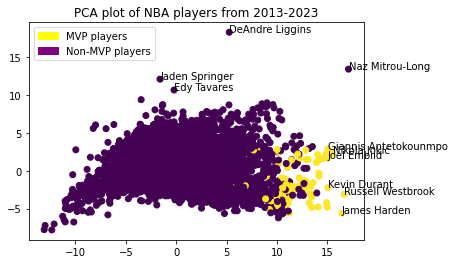

In [106]:
pca = PCA(n_components=2)
# roty_data = df[(df['season'] > 2012) & (df['experience'] == 1) & (df['season'] < 2024)].reset_index()
roty_data = df[(df['season'] > 2012) & (df['season'] < 2024)].reset_index()
roty_data
roty_target = [1 if roty_winners.isin([player]).sum() > 0 else 0 for player in roty_data['player'] ]
# roty_target[80] = 2 # Malcolm Brogdon
# roty_target[181] = 1
# roty_target[324] = 1
# roty_target[391] = 1
# roty_target[409] = 1
# roty_target[585] = 1
# roty_target[642] = 1
# roty_target[786] = 1
# roty_target[835] = 1
# roty_target[929] = 1
# roty_target[1055] = 1
# roty_target[90] = 1
roty_target = np.array(roty_target)
print(sum(roty_target))
scaled_player_data = StandardScaler().fit_transform(roty_data.drop(columns=['player', 'pos', 'team_id', 'season', 'experience']))
pca_data = pca.fit_transform(scaled_player_data)
# Import train_test_split function
from sklearn.model_selection import train_test_split

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(pca_data, roty_target, test_size=0.3,random_state=32) # 70% training and 30% test

name_list = list(roty_data['player'])
df9 = pd.DataFrame(pca_data, columns=["x", "y"])
list1 = df9[df9['x'] > 15].index.to_list()
list2 = df9[df9['y'] > 10].index.to_list()
list1.extend(list2)
for i, txt in enumerate(name_list):
    if i in list1:
        plt.annotate(txt, (pca_data[:, 0][i], pca_data[:, 1][i]))
        
plt.scatter(pca_data[:, 0], pca_data[:, 1], c=roty_target)
plt.title("PCA plot of NBA players from 2013-2023")
yellow_patch = mpatches.Patch(color='yellow', label='MVP players')
purple_patch = mpatches.Patch(color='purple', label='Non-MVP players')
plt.legend(handles=[yellow_patch, purple_patch], loc='upper left')    

In [104]:
pca_df = pd.DataFrame(pca_data)
pca_df[pca_df[0] > 15]

,0,1
602,15.030399,-2.235661
2376,16.642829,-3.119758
2748,17.088937,13.432507
2962,15.025408,2.891741
3151,16.431174,-5.610776
4833,15.529690,2.309341
5340,15.001719,1.703955


In [102]:
roty_data.iloc[1,:]

index                      13215
player              Kevin Durant
pos                           SF
age                           24
team_id                      OKC
g                             81
gs                            81
mp_per_g                    38.5
fg_per_g                     9.0
fga_per_g                   17.7
fg_pct                      0.51
fg3_per_g                    1.7
fg3a_per_g                   4.1
fg3_pct                    0.416
fg2_per_g                    7.3
fg2a_per_g                  13.6
fg2_pct                    0.539
efg_pct                    0.559
ft_per_g                     8.4
fta_per_g                    9.3
ft_pct                     0.905
orb_per_g                    0.6
drb_per_g                    7.3
trb_per_g                    7.9
ast_per_g                    4.6
stl_per_g                    1.4
blk_per_g                    1.3
tov_per_g                    3.5
pf_per_g                     1.8
pts_per_g                   28.1
mp        

In [70]:
from sklearn import svm

#Create a svm Classifier
clf = svm.SVC(kernel='linear', class_weight=None) # Linear Kernel
# clf = svm.LinearSVC(max_iter=10000, tol=1e-4, C=1)

#Train the model using the training sets
clf.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [71]:
from sklearn import metrics

# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.987111892208553


In [72]:
# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:",metrics.precision_score(y_test, y_pred))

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:",metrics.recall_score(y_test, y_pred))
print("F1-score:", metrics.f1_score(y_test, y_pred))

Precision: 0.6
Recall: 0.25
F1-score: 0.35294117647058826


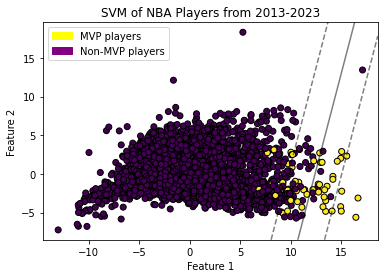

In [124]:
# name_list = list(roty_data['player'])
# df9 = pd.DataFrame(X_train, columns=["x", "y"])
# list1 = df9[df9['x'] > 15].index.to_list()
# list2 = df9[df9['y'] > 10].index.to_list()
# list1.extend(list2)
# for i, txt in enumerate(name_list):
#     if i in list1:
#         plt.annotate(txt, (X_train[:, 0][i], X_train[:, 1][i]))

plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, marker='o', edgecolors='k', label='Training Data')
# Plot decision boundary
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# Create grid to evaluate model
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = clf.decision_function(xy).reshape(XX.shape)

# Plot decision boundary and margins
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('SVM of NBA Players from 2013-2023')
yellow_patch = mpatches.Patch(color='yellow', label='MVP players')
purple_patch = mpatches.Patch(color='purple', label='Non-MVP players')
plt.legend(handles=[yellow_patch, purple_patch], loc='upper left')

In [122]:
roty_data[roty_data['player'] == 'Mario Chalmers']

,index,player,pos,age,team_id,g,gs,mp_per_g,fg_per_g,fga_per_g,...,dws,ws,ws_per_48,obpm,dbpm,bpm,vorp,season,experience,svm_distance
75,13171,Mario Chalmers,PG,26,MIA,77,77,26.9,2.9,6.9,...,2.5,5.2,0.120,-0.5,0.9,0.4,1.3,2013,5,-9.661533
556,13652,Mario Chalmers,PG,27,MIA,73,73,29.8,3.5,7.7,...,2.5,4.8,0.106,-0.3,0.5,0.2,1.2,2014,6,-8.680853
1038,14134,Mario Chalmers,PG,28,MIA,80,37,29.6,3.3,8.3,...,2.0,2.8,0.056,-2.6,0.1,-2.5,-0.3,2015,7,-9.584632
1526,14622,Mario Chalmers,PG,29,TOT,61,7,22.5,3.0,7.3,...,1.5,3.8,0.132,0.0,1.3,1.3,1.2,2016,8,-9.578774
2497,15593,Mario Chalmers,PG,31,MEM,66,10,21.5,2.5,6.7,...,1.3,0.6,0.021,-3.7,0.5,-3.2,-0.4,2018,10,-11.803535


Text(0.5, 1.0, 'SVM Decision Hyperplane')

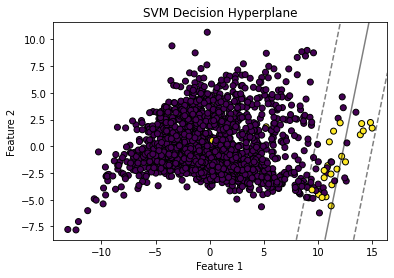

In [123]:
# name_list = list(roty_data['player'])
# df9 = pd.DataFrame(X_test, columns=["x", "y"])
# list1 = df9[df9['x'] > 15].index.to_list()
# list2 = df9[df9['y'] > 10].index.to_list()
# list1.extend(list2)
# for i, txt in enumerate(name_list):
#     if i in list1:
#         plt.annotate(txt, (X_test[:, 0][i], X_test[:, 1][i]))

plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, marker='o', edgecolors='k', label='Test Data')
# Plot decision boundary
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# Create grid to evaluate model
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = clf.decision_function(xy).reshape(XX.shape)

# Plot decision boundary and margins
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('SVM Decision Hyperplane')
    

In [115]:
clf.class_weight_

array([1., 1.])

In [116]:
w_norm = np.linalg.norm(clf.coef_)
# dist = Z / w_norm
# dist
clf.decision_function(pca_data) / w_norm

array([-14.51911258, -14.89392201,  -8.42471166, ..., -15.07977007,
       -13.85344321,  -8.69321643])

In [117]:
roty_data['svm_distance'] = clf.decision_function(pca_data) / w_norm

In [118]:
roty_data

,index,player,pos,age,team_id,g,gs,mp_per_g,fg_per_g,fga_per_g,...,dws,ws,ws_per_48,obpm,dbpm,bpm,vorp,season,experience,svm_distance
0,13096,Quincy Acy,PF,22,TOR,29,0,11.8,1.4,2.6,...,0.4,1.1,0.157,-1.0,1.0,0.1,0.2,2013,1,-14.519113
1,13097,Jeff Adrien,PF,26,CHA,52,5,13.7,1.4,3.2,...,0.4,1.0,0.064,-2.1,-0.9,-3.0,-0.2,2013,3,-14.893922
2,13098,Arron Afflalo,SF,27,ORL,64,64,36.0,6.2,14.1,...,0.5,2.0,0.042,-1.1,-1.8,-2.9,-0.5,2013,6,-8.424712
3,13099,Josh Akognon,PG,26,DAL,3,0,3.0,0.7,1.3,...,0.0,0.0,0.196,-3.1,0.1,-3.0,0.0,2013,1,-16.817049
4,13100,Cole Aldrich,C,24,TOT,45,0,8.6,1.0,1.8,...,0.4,0.6,0.070,-3.5,0.6,-2.9,-0.1,2013,3,-16.248935
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5683,18779,Thaddeus Young,PF,34,TOR,54,9,14.7,2.0,3.7,...,1.1,1.8,0.109,-1.8,1.9,0.1,0.4,2023,16,-13.663321
5684,18780,Trae Young,PG,24,ATL,73,73,34.8,8.2,19.0,...,1.4,6.7,0.126,5.3,-2.0,3.3,3.4,2023,5,-1.863818
5685,18781,Omer Yurtseven,C,24,MIA,9,0,9.2,1.8,3.0,...,0.1,0.3,0.159,-2.5,-1.5,-3.9,0.0,2023,2,-15.079770
5686,18782,Cody Zeller,C,30,MIA,15,2,14.5,2.5,3.9,...,0.3,0.7,0.147,-2.0,-0.7,-2.8,0.0,2023,10,-13.853443


In [119]:
roty_data.loc[roty_data.groupby('season')['svm_distance'].idxmax()]

,index,player,pos,age,team_id,g,gs,mp_per_g,fg_per_g,fga_per_g,...,dws,ws,ws_per_48,obpm,dbpm,bpm,vorp,season,experience,svm_distance
119,13215,Kevin Durant,SF,24,OKC,81,81,38.5,9.0,17.7,...,5.3,18.9,0.291,7.6,1.7,9.3,8.9,2013,6,1.865220
602,13698,Kevin Durant,SF,25,OKC,81,81,38.5,10.5,20.8,...,4.4,19.2,0.295,8.8,1.4,10.2,9.6,2014,7,3.025377
1148,14244,James Harden,SG,25,HOU,81,81,36.8,8.0,18.1,...,4.2,16.4,0.265,7.0,1.8,8.8,8.1,2015,6,1.709112
1547,14643,Stephen Curry,PG,27,GSW,79,79,34.2,10.2,20.2,...,4.1,17.9,0.318,10.3,1.6,11.9,9.5,2016,7,1.977320
2376,15472,Russell Westbrook,PG,28,OKC,81,81,34.6,10.2,24.0,...,4.6,13.1,0.224,8.7,2.4,11.1,9.3,2017,9,4.779761
2599,15695,James Harden,SG,28,HOU,72,72,35.4,9.0,20.1,...,3.8,15.4,0.289,8.5,1.4,9.9,7.7,2018,9,2.591918
3151,16247,James Harden,PG,29,HOU,78,78,36.8,10.8,24.5,...,3.8,15.2,0.254,9.4,1.6,11.0,9.3,2019,10,5.060206
3673,16769,James Harden,SG,30,HOU,68,68,36.5,9.9,22.3,...,3.2,13.1,0.254,8.1,1.6,9.6,7.3,2020,11,3.488522
4266,17362,Nikola Jokić,C,25,DEN,72,72,34.6,10.2,18.0,...,3.4,15.6,0.301,9.1,3.0,12.1,8.8,2021,6,1.277939
4833,17929,Nikola Jokić,C,26,DEN,74,74,33.5,10.3,17.7,...,4.5,15.2,0.296,9.2,4.5,13.7,9.8,2022,7,2.624612


## Apply distance score to all rookies and normalize per season

In [120]:
pca = PCA(n_components=2)
# final_roty_data = df[(df['season'] > 2012) & (df['experience'] == 1)].reset_index()
final_roty_data = df[(df['season'] == 2024)].reset_index()
scaled_player_data = StandardScaler().fit_transform(final_roty_data.drop(columns=['player', 'pos', 'team_id', 'season']))
final_pca_data = pca.fit_transform(scaled_player_data)
final_roty_data['svm_distance'] = clf.decision_function(final_pca_data) / w_norm
final_roty_data['norm_svm_dist_score'] = final_roty_data.apply(lambda x: x['svm_distance'] - final_roty_data.groupby('season')['svm_distance'].mean()[x['season']], axis=1)
final_roty_data.loc[final_roty_data.groupby('season')['svm_distance'].idxmax()]

,index,player,pos,age,team_id,g,gs,mp_per_g,fg_per_g,fga_per_g,...,ws,ws_per_48,obpm,dbpm,bpm,vorp,season,experience,svm_distance,norm_svm_dist_score
168,168,Luka Dončić,PG,24,DAL,53,53,37.5,11.7,23.7,...,9.3,0.226,8.6,1.5,10.1,6.1,2024,6,2.640636,14.792391


In [121]:
final_roty_data[final_roty_data['season'] == 2024].sort_values('norm_svm_dist_score', ascending=False)[:50]

,index,player,pos,age,team_id,g,gs,mp_per_g,fg_per_g,fga_per_g,...,ws,ws_per_48,obpm,dbpm,bpm,vorp,season,experience,svm_distance,norm_svm_dist_score
168,168,Luka Dončić,PG,24,DAL,53,53,37.5,11.7,23.7,...,9.3,0.226,8.6,1.5,10.1,6.1,2024,6,2.640636,14.792391
71,71,Giannis Antetokounmpo,PF,29,MIL,59,59,34.9,11.5,18.6,...,11.0,0.257,6.8,2.3,9.1,5.8,2024,11,1.912103,14.063858
180,180,Joel Embiid,C,29,PHI,34,34,34.0,11.8,22.2,...,6.7,0.279,8.9,3.0,11.9,4.1,2024,8,1.842642,13.994397
282,282,Nikola Jokić,C,28,DEN,59,59,34.0,10.2,17.6,...,12.6,0.301,9.4,4.5,13.8,8.1,2024,9,1.567007,13.718762
201,201,Shai Gilgeous-Alexander,PG,25,OKC,59,59,34.5,11.1,20.2,...,12.7,0.300,7.4,2.7,10.1,6.2,2024,6,1.308940,13.460695
157,157,Anthony Davis,C,30,LAL,58,58,35.8,9.6,17.1,...,8.9,0.205,3.4,1.6,5.0,3.7,2024,12,-1.117845,11.033910
480,480,Jayson Tatum,PF,25,BOS,57,57,35.7,9.2,19.2,...,8.4,0.197,4.6,1.0,5.5,3.8,2024,7,-1.328645,10.823109
359,359,Donovan Mitchell,SG,27,CLE,47,47,35.7,9.7,20.4,...,6.4,0.183,5.2,1.5,6.6,3.7,2024,7,-1.422731,10.729024
174,174,Kevin Durant,PF,35,PHO,54,54,37.2,10.1,19.1,...,6.6,0.158,4.7,0.2,4.9,3.5,2024,17,-1.453458,10.698297
441,441,Domantas Sabonis,C,27,SAC,59,59,35.8,8.1,13.1,...,9.2,0.208,4.4,2.2,6.6,4.6,2024,8,-1.737294,10.414461


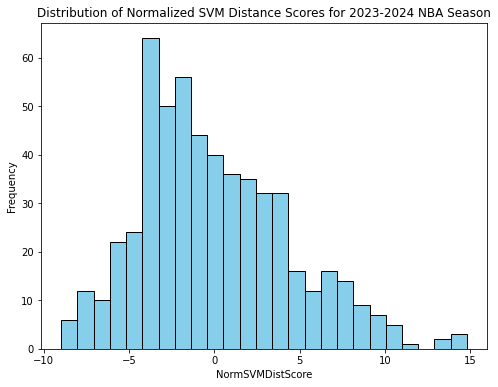

In [82]:
plt.figure(figsize=(8, 6))
plt.hist(final_roty_data['norm_svm_dist_score'], bins=25, color= 'skyblue',edgecolor='black')
plt.title('Distribution of Normalized SVM Distance Scores for 2023-2024 NBA Season')
plt.xlabel('NormSVMDistScore')
plt.ylabel('Frequency')
plt.show()

## Join voting share to rookie table

In [31]:
df8

,Rank,Player,Age,Team,First,Pts Won,Pts Max,Share,Award,Year
13,1,Paolo Banchero,20,ORL,98,494,500,0.988,ROTY,22/23
14,2,Jalen Williams,21,OKC,0,241,500,0.482,ROTY,22/23
15,3,Walker Kessler,21,UTA,2,114,500,0.228,ROTY,22/23
16,4,Bennedict Mathurin,20,IND,0,27,500,0.054,ROTY,22/23
17,5,Keegan Murray,22,SAC,0,21,500,0.042,ROTY,22/23
...,...,...,...,...,...,...,...,...,...,...
513,6T,Harrison Barnes,20,GSW,0,8,605,0.013,ROTY,12/13
514,6T,Chris Copeland,28,NYK,0,8,605,0.013,ROTY,12/13
515,8,Michael Kidd-Gilchrist,19,CHA,0,3,605,0.005,ROTY,12/13
516,9,Jonas Valančiūnas,20,TOR,0,2,605,0.003,ROTY,12/13


In [32]:
new_df = pd.merge(final_roty_data, df8, left_on=['player', 'age'], right_on=['Player','Age'], how='left', suffixes=[None, "_new"])
new2 = new_df.drop(columns=['Rank ','Player','Age','Team','Pts Won','Pts Max','Award', 'Year'])
new2['first'] = new2.apply(lambda x: 0.0 if (x['season'] != 2024 and np.isnan(x['Share'])) else x['First'], axis=1)
new2['share'] = new2.apply(lambda x: 0.0 if (x['season'] != 2024 and np.isnan(x['Share'])) else x['Share'], axis=1)


In [33]:
final_rookie = new2.drop(columns=["First", "Share"])
final_rookie

,index,player,pos,age,team_id,g,gs,mp_per_g,fg_per_g,fga_per_g,...,obpm,dbpm,bpm,vorp,season,experience,svm_distance,norm_svm_dist_score,first,share
0,19,Tosan Evbuomwan,SF,22,TOT,6,0,15.0,1.2,3.0,...,-3.1,-1.4,-4.5,-0.1,2024,1,-14.749858,-1.118402,NaN,NaN
1,30,Trey Jemison,C,24,TOT,10,4,17.1,1.9,3.9,...,-6.9,-0.1,-7.1,-0.2,2024,1,-12.731156,0.900300,NaN,NaN
2,39,Vasilije Micić,PG,30,TOT,40,1,14.8,1.8,4.4,...,-3.4,-1.8,-5.2,-0.5,2024,1,-12.382941,1.248515,NaN,NaN
3,47,Filip Petrušev,C,23,TOT,3,0,3.3,0.3,0.7,...,-4.8,-3.4,-8.1,0.0,2024,1,-17.114631,-3.483174,NaN,NaN
4,78,Ibou Badji,C,21,POR,18,1,11.3,0.7,1.1,...,-7.7,2.2,-5.6,-0.2,2024,1,-14.997147,-1.365690,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1129,18763,Jalen Williams,SG,21,OKC,75,62,30.3,5.5,10.6,...,-0.4,0.7,0.3,1.3,2023,1,-3.519178,8.818581,0.0,0.482
1130,18764,Jaylin Williams,C,20,OKC,49,36,18.7,2.1,4.8,...,-2.3,0.6,-1.7,0.1,2023,1,-10.151387,2.186371,0.0,0.000
1131,18765,Jeenathan Williams,SG,23,POR,5,4,25.4,4.8,7.8,...,-1.0,-2.1,-3.0,0.0,2023,1,-10.413069,1.924690,0.0,0.000
1132,18767,Mark Williams,C,21,CHO,43,17,19.3,3.7,5.8,...,-0.5,0.6,0.1,0.4,2023,1,-9.393348,2.944411,0.0,0.000


In [40]:
final_rookie = final_rookie.fillna(0.0)
final_rookie.to_csv('rookie_data_3_28_2024.csv')

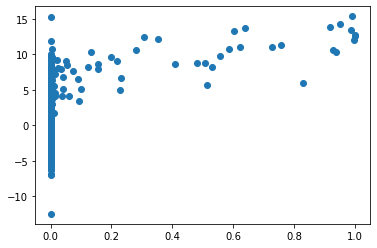

In [41]:
plt.scatter(final_rookie['share'], final_rookie['norm_svm_dist_score'])

In [73]:
final_rookie[final_rookie['share'] > 0.8].iloc[:, [1,2,3,4,5,6,7,8,9,10,52,53,55]]
# final_rookie[final_rookie['norm_svm_dist_score'] < -1].iloc[:, [1,2,3,4,5,6,7,8,9,10,52,53,55]]

,player,pos,age,team_id,g,gs,mp_per_g,fg_per_g,fga_per_g,fg_pct,svm_distance,norm_svm_dist_score,share
132,Damian Lillard,PG,22,POR,82,82,38.6,6.7,15.7,0.429,0.266038,12.764429,1.000
181,Michael Carter-Williams,PG,22,PHI,70,70,34.5,6.1,15.1,0.405,0.652922,13.808146,0.918
324,Andrew Wiggins,SF,19,MIN,82,82,36.2,6.1,13.9,0.437,-1.876692,10.660917,0.929
391,Karl-Anthony Towns,C,20,MIN,82,82,32.0,7.6,14.1,0.542,0.252125,12.619337,1.000
409,Malcolm Brogdon,SG,24,MIL,75,28,26.4,3.9,8.5,0.457,-6.623172,5.982638,0.828
585,Ben Simmons,PG,21,PHI,81,81,33.7,6.7,12.3,0.545,1.685421,14.281238,0.952
642,Luka Dončić,SG,19,DAL,72,72,32.2,7.0,16.5,0.427,2.678040,15.353803,0.992
786,Ja Morant,PG,20,MEM,67,67,31.0,6.7,14.0,0.477,-0.874387,11.961652,0.996
835,LaMelo Ball,PG,19,CHO,51,31,28.8,5.7,13.2,0.436,-1.972012,10.348876,0.939
1055,Paolo Banchero,PF,20,ORL,72,72,33.8,6.7,15.6,0.427,1.041338,13.379096,0.988


In [49]:
dropped_features = ['fg3a_per_g', 'mp_per_g', 'ast_pct', 'fta_per_g', 'fg2a_per_g', 
                    'fg3a_per_g', 'fg_per_g', 'orb_pct', 'drb_pct', 'blk_pct', 'drb_per_g',
                    'fga_per_g', 'trb_pct', 'ws_per_48', 'stl_pct', 'obpm', 'dbpm', 'usg_pct',
                    'age', 'ts_pct', 'dws', 'bpm', 'fg_pct', 'fg2_pct', 'ft_per_g',
                    'orb_per_g', 'tov_pct', 'fg3a_per_fga_pct', 'fg2_per_g', 'gs', 'ws', 'fta_per_fga_pct']

In [2]:
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt

# Step 1: Prepare your data
X = final_rookie.drop(columns=['index', 'player', 'pos', 'team_id', 'season', 'experience', 'first', 'share', 'svm_distance'])
# Drop the 'won_dpoy' column to create the feature matrix
# X = X.drop(columns=dropped_features)
y = final_rookie['share']  # Select only the 'won_dpoy' column as the target variable

# Step 2: Import libraries

# Step 3: Instantiate the Random Forest model
rf_model = RandomForestRegressor()

# Step 4: Fit the model to your data
rf_model.fit(X, y)

# Step 5: Retrieve feature importances
feature_importances = rf_model.feature_importances_

# Step 6: Pair feature importances with feature names
feature_importance_dict = dict(zip(X.columns, feature_importances))

# Step 7: Sort features by importance
sorted_features = sorted(feature_importance_dict.items(), key=lambda x: x[1], reverse=True)

# Visualize the importance of features using a bar plot
# Extract feature names and importances
features, importances = zip(*sorted_features)

# Plot
plt.figure(figsize=(10, 6))
plt.barh(range(len(features)), importances, align='center')
plt.yticks(range(len(features)), features)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Random Forest Feature Importance for ROTY')
plt.show()

NameError: name 'final_rookie' is not defined

NameError: name 'X' is not defined